Importação dos dados que estão presente em um repositório no Github no formato de arquivos .csv

In [1]:
import pandas as pd
import numpy as np

In [2]:
cyl_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras_csv_files/Database_1/df1_mov_cyl.csv?raw=true', compression=None)
hook_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras_csv_files/Database_1/df1_mov_hook.csv?raw=true', compression=None)
lat_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras_csv_files/Database_1/df1_mov_lat.csv?raw=true', compression=None)
palm_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras_csv_files/Database_1/df1_mov_palm.csv?raw=true', compression=None)
spher_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras_csv_files/Database_1/df1_mov_spher.csv?raw=true', compression=None)
tip_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras_csv_files/Database_1/df1_mov_tip.csv?raw=true', compression=None)

In [ ]:
cyl_01 = cyl_00.drop(cyl_00.columns[0], axis=1)
hook_01 = hook_00.drop(hook_00.columns[0], axis=1)
lat_01 = lat_00.drop(lat_00.columns[0], axis=1)
palm_01 = palm_00.drop(palm_00.columns[0], axis=1)
spher_01 = spher_00.drop(spher_00.columns[0], axis=1)
tip_01 = tip_00.drop(tip_00.columns[0], axis=1)

In [ ]:
cyl = np.array_split(cyl_01, 30, axis=1)
hook = np.array_split(hook_01, 30, axis=1)
lat = np.array_split(lat_01, 30, axis=1)
palm = np.array_split(palm_01, 30, axis=1)
spher = np.array_split(spher_01, 30, axis=1)
tip = np.array_split(tip_01, 30, axis=1)

In [ ]:
def concatDf (df):
  aux_df = pd.DataFrame(columns = df[0].columns)

  for i in range (30):
  
    a = df[i].T.reset_index(drop=True).T
    aux_df = pd.concat([aux_df,a])

  aux_df_2 = aux_df.reset_index(drop=True)

  return aux_df_2

In [ ]:
cyl_DA = concatDf (cyl)
hook_DA = concatDf(hook)
lat_DA = concatDf(lat)
palm_DA = concatDf(palm)
spher_DA = concatDf(spher)
tip_DA = concatDf(tip)

Definição da matriz de entrada *x*

In [ ]:
x = pd.concat([cyl_DA,hook_DA,lat_DA,palm_DA,spher_DA,tip_DA], ignore_index=True)
x = x.dropna(axis=1)

In [ ]:
x = x.values.reshape(x.shape[0], x.shape[1], 1) #comando necessário para colocar a matriz de entrada x em um formato compatível com os neurônios de um CNN. Neste caso, foi necessário fazer uma camada de profundidade igual a 1.
print(x.shape)

(27000, 100, 1)


Definição da matriz de saída *y*

In [ ]:
base = np.ones((4500,1), dtype=np.int64)
mov_cyl = base*0
mov_hook = base*1
mov_lat = base*2
mov_palm = base*3
mov_spher = base*4
mov_tip = base*5

In [ ]:
mov = np.vstack([mov_cyl,mov_hook,mov_lat,mov_palm,mov_spher,mov_tip])
y = pd.DataFrame(mov)

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


CNN 1D - MODELO 1

In [ ]:
import keras
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import GlobalAveragePooling1D
from keras.layers import Flatten

In [ ]:
num_classes = 6

model = keras.models.Sequential()
model.add(Conv1D(128, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(64, kernel_size=5, activation='relu'))
model.add(Conv1D(64, kernel_size=5, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 98, 128)           512       
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 128)           49280     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 48, 128)          0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 44, 64)            41024     
                                                                 
 conv1d_3 (Conv1D)           (None, 40, 64)            20544     
                                                                 
 flatten (Flatten)           (None, 2560)              0         
                                                        

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
treino = model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
566/566 [==============================] - 25s 42ms/step - loss: 1.4109 - accuracy: 0.3794
Epoch 2/10
566/566 [==============================] - 24s 42ms/step - loss: 1.2578 - accuracy: 0.4508
Epoch 3/10
566/566 [==============================] - 23s 41ms/step - loss: 1.1801 - accuracy: 0.4928
Epoch 4/10
566/566 [==============================] - 24s 42ms/step - loss: 1.1176 - accuracy: 0.5283
Epoch 5/10
566/566 [==============================] - 23s 41ms/step - loss: 1.0498 - accuracy: 0.5660
Epoch 6/10
566/566 [==============================] - 23s 41ms/step - loss: 1.0041 - accuracy: 0.5917
Epoch 7/10
566/566 [==============================] - 23s 40ms/step - loss: 0.9572 - accuracy: 0.6160
Epoch 8/10
566/566 [==============================] - 23s 41ms/step - loss: 0.9074 - accuracy: 0.6380
Epoch 9/10
566/566 [==============================] - 23s 41ms/step - loss: 0.8642 - accuracy: 0.6562
Epoch 10/10
566/566 [==============================] - 23s 41ms/step - loss: 0.824

In [ ]:
avaliacao = model.evaluate(x_train,y_train)

566/566 [==============================] - 7s 12ms/step - loss: 0.7149 - accuracy: 0.7329


Avaliação do Modelo via Matriz de Confusão

In [ ]:
from sklearn.metrics import confusion_matrix

pred = model.predict(x_test)
y_pred = pred.argmax(axis=-1)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 834  207   38   31  244  163]
 [ 174  817   64   63  290   64]
 [  50   22  706  158   21  532]
 [ 115   94  136  674   83  387]
 [ 148  200   28   23 1023   57]
 [  81   53  143  107   16 1064]]


In [ ]:
qualidade = cm.diagonal()/cm.sum(axis=1)
qualidade

array([0.54976928, 0.55502717, 0.47414372, 0.45265279, 0.69168357,
       0.72677596])

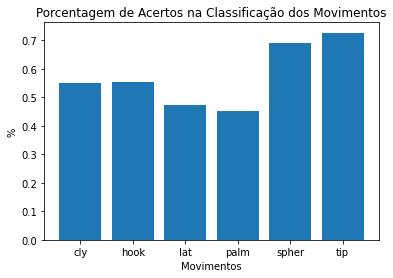

In [ ]:
import matplotlib.pyplot as plt

grupos = ['cly', 'hook', 'lat', 'palm', 'spher', 'tip']
plt.bar(grupos, qualidade)
plt.xlabel('Movimentos')
plt.ylabel('%')
plt.title('Porcentagem de Acertos na Classificação dos Movimentos')
plt.show()

In [ ]:
desvio = np.std(qualidade)
desvio

0.10232898618587376

In [ ]:
df_cm = pd.DataFrame(cm, range(6),range(6))

In [ ]:
pip install pretty_confusion_matrix

     |████████████████████████████████| 11.3 MB 30.3 MB/s 
     |████████████████████████████████| 11.2 MB 58.4 MB/s 
     |████████████████████████████████| 15.7 MB 41.8 MB/s 
     |████████████████████████████████| 191 kB 64.8 MB/s 
     |████████████████████████████████| 103 kB 32.1 MB/s 
     |████████████████████████████████| 73 kB 1.7 MB/s 
     |████████████████████████████████| 156 kB 64.4 MB/s 
     |████████████████████████████████| 843 kB 26.6 MB/s 
     |████████████████████████████████| 68 kB 7.3 MB/s 
     |████████████████████████████████| 41 kB 635 kB/s 
     |████████████████████████████████| 890 kB 60.5 MB/s 
     |████████████████████████████████| 6.5 MB 58.8 MB/s 
     |████████████████████████████████| 98 kB 8.6 MB/s 
     |████████████████████████████████| 596 kB 77.2 MB/s 
     |████████████████████████████████| 461 kB 21.9 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstall

/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be remo

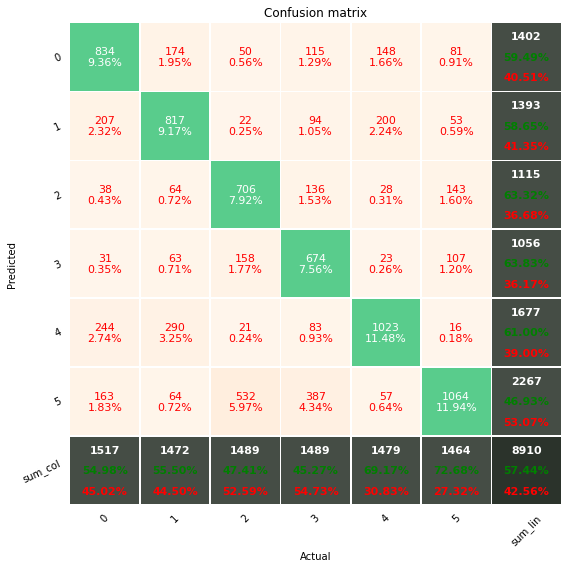

In [ ]:
import numpy as np
from pretty_confusion_matrix import pp_matrix

pp_matrix(df_cm)